## Data Preprocessing 

### Imports


In [190]:
# Data Analysis and Visualization

import pandas as pd               # Data manipulation and analysis
import numpy as np                # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Statistical data visualization
# from sklearn import datasets      # Import datasets from scikit-learn

# Statistical Analysis
from scipy import stats           # Statistical functions

# Machine Learning
from sklearn.model_selection import train_test_split   # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   # Evaluation metrics

# Deep Learning
import tensorflow as tf           # Deep learning framework
from tensorflow.keras.models import Sequential        # Sequential model in Keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout  # Layers for neural networks
from tensorflow.keras.optimizers import Adam, RMSprop # Optimizers for training
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy  # Loss functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # Callbacks for model training

### Exploratory Data Analysis EDA

In [191]:
# Now, you can read the dataset using pandas
import pandas as pd # type: ignore

# Assuming it's an Excel file
df_original = pd.read_excel('kaggleSalesData.xlsx')


In [192]:
df_original.head()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,ID,ORDERID,ORDERDETAILID,DATE_,USERID,USERNAME_,NAMESURNAME,STATUS_,ITEMID,ITEMCODE,...,CATEGORY3,CATEGORY4,BRAND,USERGENDER,USERBIRTHDATE,REGION,CITY,TOWN,DISTRICT,ADDRESSTEXT
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [193]:
df_original.shape

(1000000, 27)

In [194]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ID             1000000 non-null  int64         
 1   ORDERID        1000000 non-null  int64         
 2   ORDERDETAILID  1000000 non-null  int64         
 3   DATE_          1000000 non-null  datetime64[ns]
 4   USERID         1000000 non-null  int64         
 5   USERNAME_      1000000 non-null  object        
 6   NAMESURNAME    1000000 non-null  object        
 7   STATUS_        1000000 non-null  int64         
 8   ITEMID         1000000 non-null  int64         
 9   ITEMCODE       1000000 non-null  int64         
 10  ITEMNAME       1000000 non-null  object        
 11  AMOUNT         1000000 non-null  int64         
 12  UNITPRICE      1000000 non-null  float64       
 13  PRICE          1000000 non-null  float64       
 14  TOTALPRICE     1000000 non-null  fl

In [195]:
df_original.isna().sum()

ID                  0
ORDERID             0
ORDERDETAILID       0
DATE_               0
USERID              0
USERNAME_           0
NAMESURNAME         0
STATUS_             0
ITEMID              0
ITEMCODE            0
ITEMNAME            0
AMOUNT              0
UNITPRICE           0
PRICE               0
TOTALPRICE          0
CATEGORY1           0
CATEGORY2           0
CATEGORY3           0
CATEGORY4        3047
BRAND              31
USERGENDER          0
USERBIRTHDATE       0
REGION              0
CITY                0
TOWN                0
DISTRICT            0
ADDRESSTEXT         0
dtype: int64

In [196]:
df_original.describe()

,ID,ORDERID,ORDERDETAILID,DATE_,USERID,STATUS_,ITEMID,ITEMCODE,AMOUNT,UNITPRICE,PRICE,TOTALPRICE,USERBIRTHDATE
count,1000000.000000,1000000.000000,1.000000e+06,1000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000
mean,500000.500000,99948.420176,5.000005e+05,2022-04-23 07:56:18.787200768,9998.102168,1.0,13508.715688,22190.216464,4.501097,64.513020,56.598432,254.743137,1974-12-21 16:48:43.199999968
min,1.000000,1.000000,1.000000e+00,2021-01-01 00:00:00,1.000000,1.0,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1950-01-01 00:00:00
25%,250000.750000,49984.000000,2.500008e+05,2021-08-28 00:00:00,5005.000000,1.0,6747.000000,11310.000000,3.000000,15.200000,12.730000,42.480000,1962-06-29 00:00:00
50%,500000.500000,99895.000000,5.000005e+05,2022-04-22 00:00:00,9981.000000,1.0,13514.000000,22062.000000,5.000000,35.400000,30.620000,116.000000,1974-12-13 00:00:00
75%,750000.250000,149986.000000,7.500002e+05,2022-12-19 00:00:00,15006.000000,1.0,20257.000000,32669.000000,6.000000,77.950000,67.680000,287.250000,1987-06-07 00:00:00
max,1000000.000000,199627.000000,1.000004e+06,2023-08-14 00:00:00,20000.000000,1.0,27000.000000,45157.000000,8.000000,6302.300000,7098.880000,53427.600000,1999-12-19 00:00:00
std,288675.278932,57664.175911,2.886753e+05,NaN,5767.561918,0.0,7797.099560,12562.166905,2.291865,112.526535,100.464994,529.527577,NaN


In [197]:
female_count = df_original[df_original['USERGENDER'] == "K"]['USERID'].nunique()
male_count = df_original[df_original['USERGENDER'] == "E"]['USERID'].nunique()
print('female_count :',female_count)
print('male_count   :',male_count)

female_count : 10926
male_count   : 9071


### Data Cleaning

In [198]:
# Work on a copy from the original data frame
df = df_original.copy()


In [199]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()
df.head()

,id,orderid,orderdetailid,date_,userid,username_,namesurname,status_,itemid,itemcode,...,category3,category4,brand,usergender,userbirthdate,region,city,town,district,addresstext
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,K,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [200]:
# Handling Missing Values
# type: ignore
df['brand'].fillna('unknown', inplace=True)
df['category4'].fillna('unknown', inplace=True)

df.info()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12984\1984670291.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('unknown', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12984\1984670291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1000000 non-null  int64         
 1   orderid        1000000 non-null  int64         
 2   orderdetailid  1000000 non-null  int64         
 3   date_          1000000 non-null  datetime64[ns]
 4   userid         1000000 non-null  int64         
 5   username_      1000000 non-null  object        
 6   namesurname    1000000 non-null  object        
 7   status_        1000000 non-null  int64         
 8   itemid         1000000 non-null  int64         
 9   itemcode       1000000 non-null  int64         
 10  itemname       1000000 non-null  object        
 11  amount         1000000 non-null  int64         
 12  unitprice      1000000 non-null  float64       
 13  price          1000000 non-null  float64       
 14  totalprice     1000000 non-null  fl

In [201]:
# Count the number of missing values 
# type: ignore
num_columns_with_null = df.isnull().any().sum()
print("Number of columns with null values:", num_columns_with_null)

Number of columns with null values: 0


In [202]:
# Handling Duplicate Data
# type: ignore
df.drop_duplicates()

# Check data size then
print('There is no dupliclates ^-^')
df.shape

There is no dupliclates ^-^


(1000000, 27)

### Data Taransformation

In [203]:
# Correcting the calculation for (TOTALPRICE) column
# type: ignore
df['totalprice'] = df['amount'] * df['price']

In [204]:
# Change the values in USERGENDER from categorical to numerical in Binary format
# type: ignore
df['usergender'] = df['usergender'].replace({'K': 0, 'E': 1})
df.info()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12984\3198019313.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['usergender'] = df['usergender'].replace({'K': 0, 'E': 1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1000000 non-null  int64         
 1   orderid        1000000 non-null  int64         
 2   orderdetailid  1000000 non-null  int64         
 3   date_          1000000 non-null  datetime64[ns]
 4   userid         1000000 non-null  int64         
 5   username_      1000000 non-null  object        
 6   namesurname    1000000 non-null  object        
 7   status_        1000000 non-null  int64         
 8   itemid         1000000 non-null  int64         
 9   itemcode       1000000 non-null  int64         
 10  itemname       1000000 non-null  object        
 11  amount         1000000 non-null  int64         
 12  unitprice      1000000 non-null  float64       
 13  price          1000000 non-null  float64       
 14  totalprice     1000000 non-null  fl

In [205]:
val_counts = dict(df["itemname"].value_counts()[:10])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12984\581825913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")


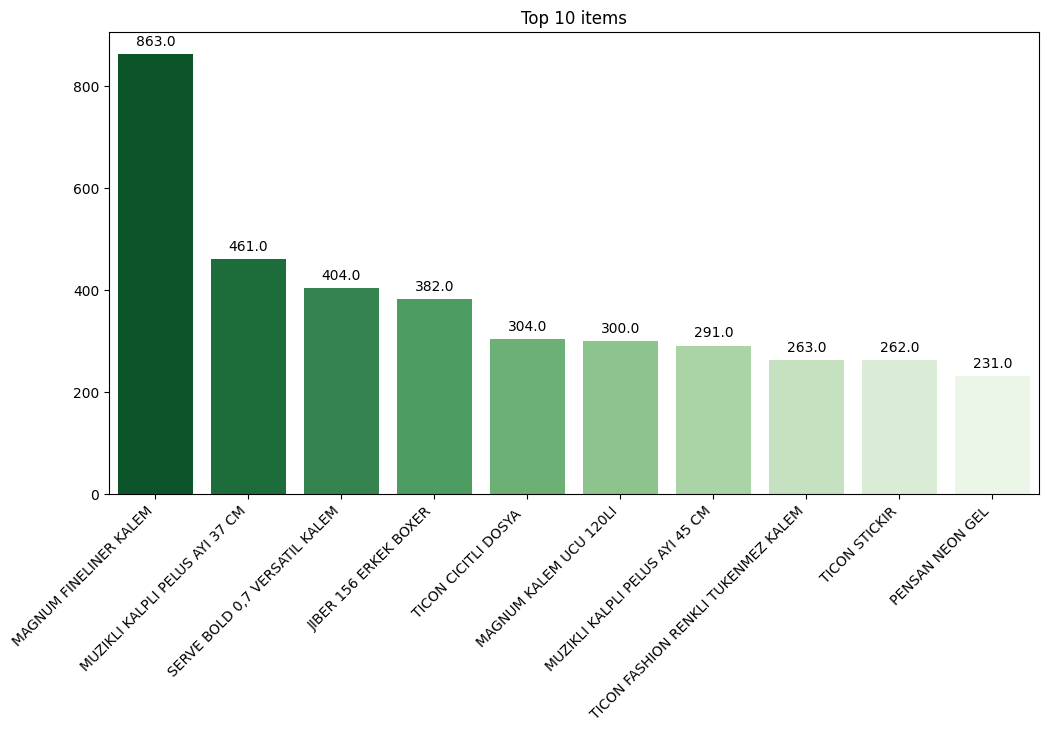

In [206]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add a title
plt.title('Top 10 items')

# Add count labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),  # 9 points vertical offset
                     textcoords = 'offset points')

# Show the plot
plt.show()

### Feature Selection & data reduction

In [207]:
df.head()

,id,orderid,orderdetailid,date_,userid,username_,namesurname,status_,itemid,itemcode,...,category3,category4,brand,usergender,userbirthdate,region,city,town,district,addresstext
0,1,1,2,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,7438,22961,...,KITAP,KITAPLAR,KITAPLAR,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
1,2,1,4,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,12188,5482,...,HASERE OLDURUCULER,MAKINE LIKIT,DETAN,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
2,3,1,1,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,16347,30000,...,GOFRET,MUZLU,ULKER,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
3,4,1,5,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,21297,44140,...,CAMASIR YUMUSATICILAR,KLASIK,VERNEL,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...
4,5,1,3,2021-04-19,14549,seb_renktas@fakegmail.com,Sebahat RENKTAŞ,1,19984,31325,...,BAKLIYAT,FASULYELER,BIZIM,0,1955-04-05,Akdeniz,Hatay,KIRIKHAN,MİMAR SİNAN MAH.,MİMAR SİNAN MAH. 721. SOKAK 31440 KIRIKHAN/H...


In [208]:
# Drop useless columns
df.drop(columns=['id','status_','username_','namesurname','itemcode','itemname',],axis=1, inplace=True)
df.shape

(1000000, 21)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   orderid        1000000 non-null  int64         
 1   orderdetailid  1000000 non-null  int64         
 2   date_          1000000 non-null  datetime64[ns]
 3   userid         1000000 non-null  int64         
 4   itemid         1000000 non-null  int64         
 5   amount         1000000 non-null  int64         
 6   unitprice      1000000 non-null  float64       
 7   price          1000000 non-null  float64       
 8   totalprice     1000000 non-null  float64       
 9   category1      1000000 non-null  object        
 10  category2      1000000 non-null  object        
 11  category3      1000000 non-null  object        
 12  category4      1000000 non-null  object        
 13  brand          1000000 non-null  object        
 14  usergender     1000000 non-null  in

## may be deleted later

In [210]:
#Detecting the least frequent items
val_counts = df["itemid"].value_counts()
val_counts.tail(10)

itemid
254      18
22003    18
24355    18
13238    18
25331    18
1354     18
24179    18
24350    17
11531    17
11481    14
Name: count, dtype: int64

In [211]:
excluded = list(val_counts[val_counts.values < 2].index)
transactions=[]
for action in df["orderid"].unique():
    transaction=list(set(df[df["orderid"]==action]['itemid']))
    if not any(x in transaction for x in excluded):
        if len(transaction) != 1:
            transactions.append(transaction)
transactions[0:20]

[[7438, 19984, 21297, 16347, 12188],
 [10337, 8392, 4424, 6761, 8617, 25910, 10046],
 [7520, 16171, 5588, 20411, 17023],
 [4152, 11925],
 [23225, 17154],
 [11856, 18866, 23371],
 [2208, 2242, 14627, 5252, 22447, 13943, 11864],
 [18021, 2130, 16051, 17173, 8762],
 [10306, 11587, 9830, 15271, 3271, 14958, 23956, 23957],
 [13392, 2929, 4977, 4259],
 [9312, 16538, 16283, 2596],
 [26437, 902, 9705, 3754, 20656, 10741, 13786, 9756, 20830],
 [21827, 18308, 17286, 10605, 531, 7766, 3062],
 [14976, 24548, 6888, 23472, 11507, 8726, 17943, 9274],
 [23459, 8774, 1171, 15581, 17053, 5662],
 [19108, 24073, 23660, 25808, 21843, 5982],
 [22187, 17951],
 [11777, 10547, 5716, 25560, 14268, 25022],
 [640, 10176, 24619, 6607, 23510],
 [11360, 18773]]

## Market Basket analysis




In [212]:
# Recover transaction itemsets from orders DataFrame.
transactions = df.groupby("orderid").category1.unique()

# Print transactions header.
transactions.head()

orderid
1    [EV, TEMIZLIK, SEKERLEME, DETERJAN, GIDA]
2              [EV, SEKERLEME, KOZMETIK, GIDA]
3                                  [SEKERLEME]
4                            [EV, KAGIT, GIDA]
5                                    [OYUNCAK]
Name: category1, dtype: object

In [213]:

from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [214]:
# Print header.
onehot.head()

,BALIK,BEBEK,CAY-KAHVE-SEKER,DETERJAN,ET,EV,GIDA,KAGIT,KAHVALTILIK,KARO,...,OYUNCAK,SARF,SEBZE,SEKERLEME,SICAK ICECEKLER,SIGARALAR,SOGUK ICECEKLER,SUT,TEMIZLIK,YESILLIK
0,False,False,False,True,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [215]:
# Print support metric over all rows for each column.
onehot.mean(axis=0)

BALIK              0.005460
BEBEK              0.146423
CAY-KAHVE-SEKER    0.054176
DETERJAN           0.177636
ET                 0.054141
EV                 0.810462
GIDA               0.430212
KAGIT              0.053966
KAHVALTILIK        0.182455
KARO               0.007228
KOZMETIK           0.441068
KUMES              0.017167
MEYVE              0.021044
MUHTELIF           0.003862
OYUNCAK            0.334444
SARF               0.026620
SEBZE              0.024441
SEKERLEME          0.245563
SICAK ICECEKLER    0.028513
SIGARALAR          0.017157
SOGUK ICECEKLER    0.112916
SUT                0.142781
TEMIZLIK           0.141469
YESILLIK           0.005195
dtype: float64

In [216]:
# Print distribution of item counts.
onehot.sum(axis=1).value_counts()

4    41015
3    40069
2    34112
5    32900
1    27645
6    17342
7     5521
8      962
9       61
Name: count, dtype: int64

In [217]:
# # Add GIDA and EV to DataFrame.
# onehot['Ev-GIDA'] = onehot['EV'] & onehot['GIDA']

# # Print support value.
# onehot['Ev-GIDA'].mean(axis = 0)

In [218]:
# # Merge EV and GIDA.
# onehot['Ev-GIDA'] = onehot['EV'] | onehot['GIDA']

# # Print support values for Ev-GIDA, EV, and GIDA.
# onehot[['Ev-GIDA','EV','GIDA']].mean(axis=0)

In [219]:
# # Compute joint support for EV and GIDA.
# joint_support = (onehot['EV'] & onehot['GIDA']).mean()

# # Print confidence metric for EV -> GIDA.
# joint_support / onehot['EV'].mean()

In [220]:
# # Print confidence for GIDA -> EV.
# joint_support / onehot['GIDA'].mean()

### Applying the Apriori algorithm


In [221]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data with min support threshold of 0.01.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.146423,(1)
1,0.054176,(2)
2,0.177636,(3)
3,0.054141,(4)
4,0.810462,(5)
...,...,...
300,0.010996,"(10, 21, 6, 14)"
301,0.011186,"(10, 22, 6, 14)"
302,0.011997,"(3, 5, 6, 10, 14)"
303,0.012338,"(5, 6, 8, 10, 14)"


In [222]:
# Apply apriori algorithm to data with min support threshold of 0.001.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
frequent_itemsets

,support,itemsets
0,0.005460,(BALIK)
1,0.146423,(BEBEK)
2,0.054176,(CAY-KAHVE-SEKER)
3,0.177636,(DETERJAN)
4,0.054141,(ET)
...,...,...
1808,0.001643,"(SEKERLEME, KOZMETIK, OYUNCAK, GIDA, SOGUK ICE..."
1809,0.002214,"(SEKERLEME, KOZMETIK, OYUNCAK, GIDA, SUT, EV)"
1810,0.002470,"(SEKERLEME, TEMIZLIK, KOZMETIK, OYUNCAK, GIDA,..."
1811,0.001317,"(TEMIZLIK, KOZMETIK, OYUNCAK, GIDA, SUT, EV)"


In [223]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.001, max_len = 2, use_colnames = True)

### Computing association rules from Apriori output


In [224]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold of 0.0001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules header.
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(DETERJAN),0.005460,0.177636,0.001027,0.188073,1.058755,0.000057,1.012855,0.055800
1,(DETERJAN),(BALIK),0.177636,0.005460,0.001027,0.005781,1.058755,0.000057,1.000323,0.067482
2,(BALIK),(EV),0.005460,0.810462,0.004599,0.842202,1.039163,0.000173,1.201145,0.037894
3,(EV),(BALIK),0.810462,0.005460,0.004599,0.005674,1.039163,0.000173,1.000215,0.198837
4,(BALIK),(GIDA),0.005460,0.430212,0.002555,0.467890,1.087579,0.000206,1.070808,0.080969
5,(GIDA),(BALIK),0.430212,0.005460,0.002555,0.005938,1.087579,0.000206,1.000481,0.141327
6,(BALIK),(KAHVALTILIK),0.005460,0.182455,0.001017,0.186239,1.020735,0.000021,1.004649,0.020426
7,(KAHVALTILIK),(BALIK),0.182455,0.005460,0.001017,0.005573,1.020735,0.000021,1.000114,0.024848
8,(KOZMETIK),(BALIK),0.441068,0.005460,0.002650,0.006008,1.100333,0.000242,1.000551,0.163140
9,(BALIK),(KOZMETIK),0.005460,0.441068,0.002650,0.485321,1.100333,0.000242,1.085983,0.091685


### Pruning association rules

In [225]:
# Recover association rules using confidence threshold of 0.01.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(DETERJAN),0.005460,0.177636,0.001027,0.188073,1.058755,0.000057,1.012855,0.055800
1,(BALIK),(EV),0.005460,0.810462,0.004599,0.842202,1.039163,0.000173,1.201145,0.037894
2,(BALIK),(GIDA),0.005460,0.430212,0.002555,0.467890,1.087579,0.000206,1.070808,0.080969
3,(BALIK),(KAHVALTILIK),0.005460,0.182455,0.001017,0.186239,1.020735,0.000021,1.004649,0.020426
4,(BALIK),(KOZMETIK),0.005460,0.441068,0.002650,0.485321,1.100333,0.000242,1.085983,0.091685
5,(BALIK),(OYUNCAK),0.005460,0.334444,0.002039,0.373394,1.116464,0.000213,1.062162,0.104888
6,(BALIK),(SEKERLEME),0.005460,0.245563,0.001408,0.257798,1.049825,0.000067,1.016485,0.047721
7,(BEBEK),(CAY-KAHVE-SEKER),0.146423,0.054176,0.008561,0.058467,1.079210,0.000628,1.004558,0.085987
8,(CAY-KAHVE-SEKER),(BEBEK),0.054176,0.146423,0.008561,0.158021,1.079210,0.000628,1.013775,0.077600
9,(BEBEK),(DETERJAN),0.146423,0.177636,0.027496,0.187787,1.057141,0.001486,1.012497,0.063324


In [226]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(DETERJAN),0.005460,0.177636,0.001027,0.188073,1.058755,0.000057,1.012855,0.055800
1,(BALIK),(EV),0.005460,0.810462,0.004599,0.842202,1.039163,0.000173,1.201145,0.037894
2,(BALIK),(GIDA),0.005460,0.430212,0.002555,0.467890,1.087579,0.000206,1.070808,0.080969
3,(BALIK),(KAHVALTILIK),0.005460,0.182455,0.001017,0.186239,1.020735,0.000021,1.004649,0.020426
4,(BALIK),(KOZMETIK),0.005460,0.441068,0.002650,0.485321,1.100333,0.000242,1.085983,0.091685
...,...,...,...,...,...,...,...,...,...,...
368,(SOGUK ICECEKLER),(SUT),0.112916,0.142781,0.017142,0.151812,1.063250,0.001020,1.010647,0.067060
369,(TEMIZLIK),(SOGUK ICECEKLER),0.141469,0.112916,0.017022,0.120322,1.065588,0.001048,1.008419,0.071694
370,(SOGUK ICECEKLER),(TEMIZLIK),0.112916,0.141469,0.017022,0.150748,1.065588,0.001048,1.010926,0.069386
371,(SUT),(TEMIZLIK),0.142781,0.141469,0.021139,0.148055,1.046553,0.000940,1.007730,0.051891


### The leverage metric


In [227]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BALIK),(DETERJAN),0.005460,0.177636,0.001027,0.188073,1.058755,0.000057,1.012855,0.055800
1,(BALIK),(EV),0.005460,0.810462,0.004599,0.842202,1.039163,0.000173,1.201145,0.037894
2,(BALIK),(GIDA),0.005460,0.430212,0.002555,0.467890,1.087579,0.000206,1.070808,0.080969
3,(BALIK),(KAHVALTILIK),0.005460,0.182455,0.001017,0.186239,1.020735,0.000021,1.004649,0.020426
4,(BALIK),(KOZMETIK),0.005460,0.441068,0.002650,0.485321,1.100333,0.000242,1.085983,0.091685
...,...,...,...,...,...,...,...,...,...,...
368,(SOGUK ICECEKLER),(SUT),0.112916,0.142781,0.017142,0.151812,1.063250,0.001020,1.010647,0.067060
369,(TEMIZLIK),(SOGUK ICECEKLER),0.141469,0.112916,0.017022,0.120322,1.065588,0.001048,1.008419,0.071694
370,(SOGUK ICECEKLER),(TEMIZLIK),0.112916,0.141469,0.017022,0.150748,1.065588,0.001048,1.010926,0.069386
371,(SUT),(TEMIZLIK),0.142781,0.141469,0.021139,0.148055,1.046553,0.000940,1.007730,0.051891


In [228]:
rules_zhang= rules[rules['zhangs_metric'] > 0]

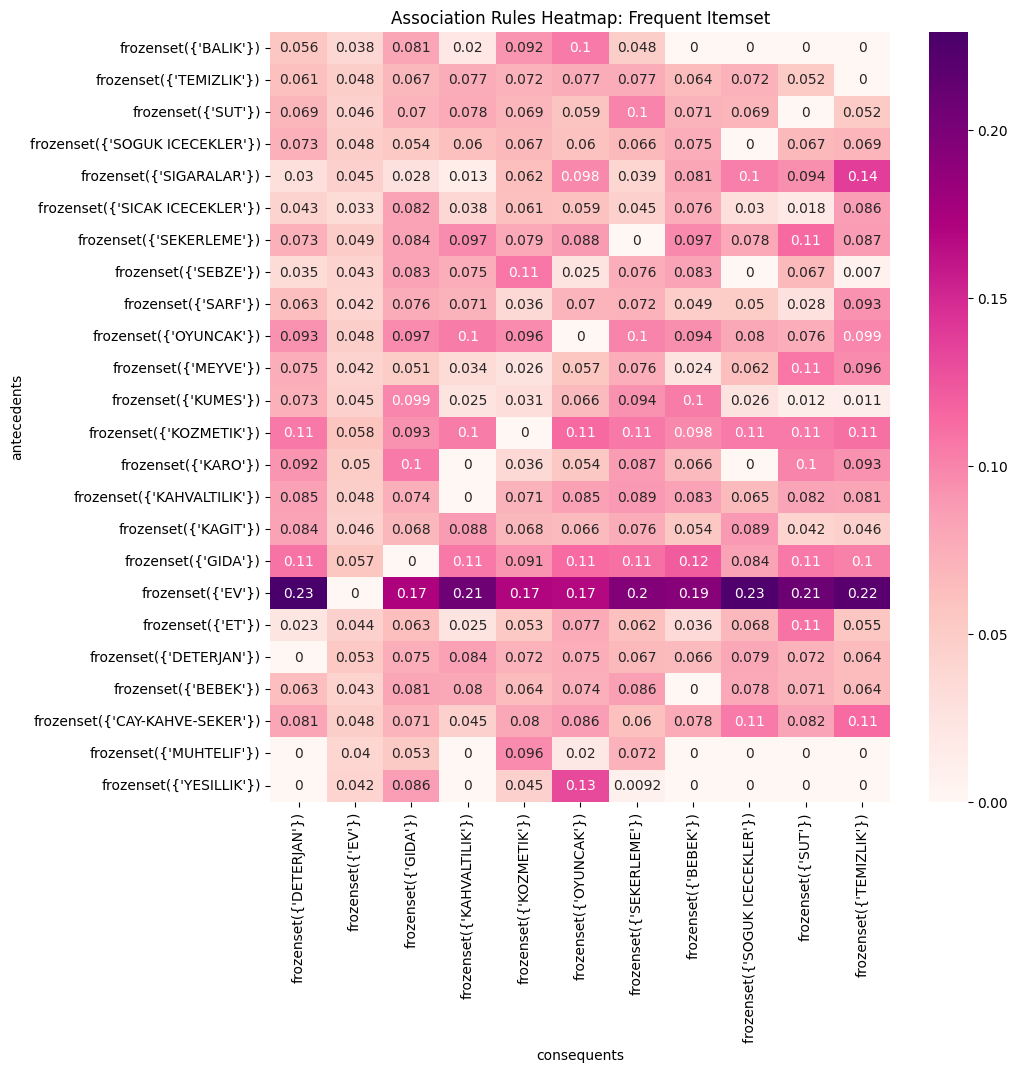

In [229]:
# Creating matrix and heatmap of association
association = rules_zhang.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
plt.figure(figsize=(10, 10))
sns.heatmap(association, annot=True, cmap='RdPu')
plt.title('Association Rules Heatmap: Frequent Itemset')
plt.show()

### Visualizing patterns in metrics


<Axes: xlabel='leverage', ylabel='confidence'>

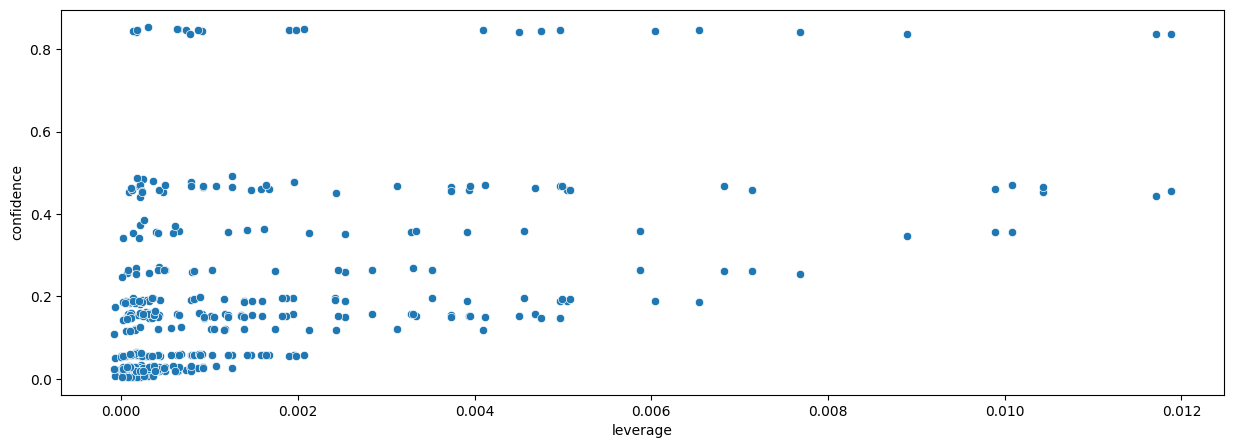

In [230]:
# Recover association rules with a minimum support greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt
import seaborn as sns

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

In [231]:
# Assuming 'rules' contains the DataFrame you want to sort
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
165,(EV),(KOZMETIK),0.810462,0.441068,0.369349,0.455727,1.033235,0.011881,1.026933,0.169708
164,(KOZMETIK),(EV),0.441068,0.810462,0.369349,0.837397,1.033235,0.011881,1.165654,0.057549
156,(GIDA),(EV),0.430212,0.810462,0.360377,0.837673,1.033575,0.011707,1.167631,0.057011
157,(EV),(GIDA),0.810462,0.430212,0.360377,0.444657,1.033575,0.011707,1.026010,0.171386
173,(EV),(OYUNCAK),0.810462,0.334444,0.279947,0.345417,1.032810,0.008893,1.016764,0.167606
...,...,...,...,...,...,...,...,...,...,...
334,(SEKERLEME),(MUHTELIF),0.245563,0.003862,0.001022,0.004161,1.077489,0.000073,1.000301,0.095325
243,(SIGARALAR),(KAGIT),0.017157,0.053966,0.001022,0.059562,1.103703,0.000096,1.005951,0.095599
242,(KAGIT),(SIGARALAR),0.053966,0.017157,0.001022,0.018936,1.103703,0.000096,1.001814,0.099319
7,(KAHVALTILIK),(BALIK),0.182455,0.005460,0.001017,0.005573,1.020735,0.000021,1.000114,0.024848


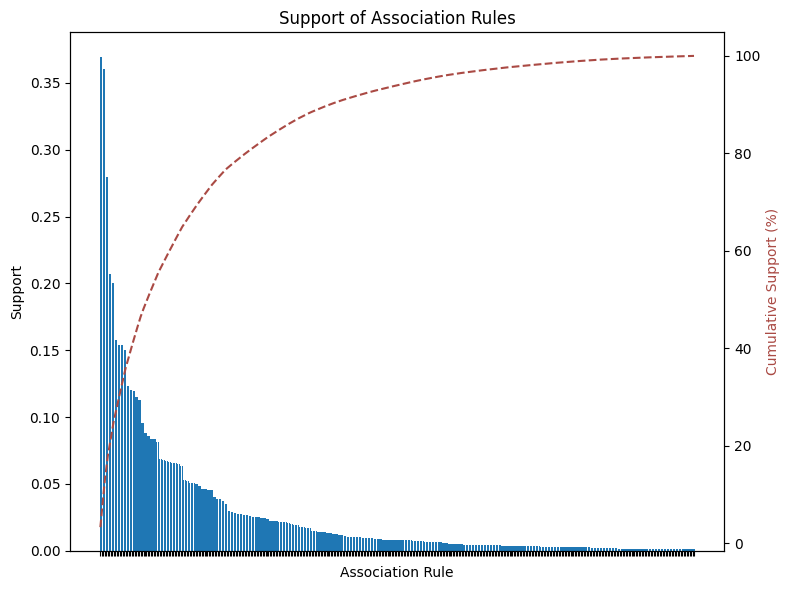

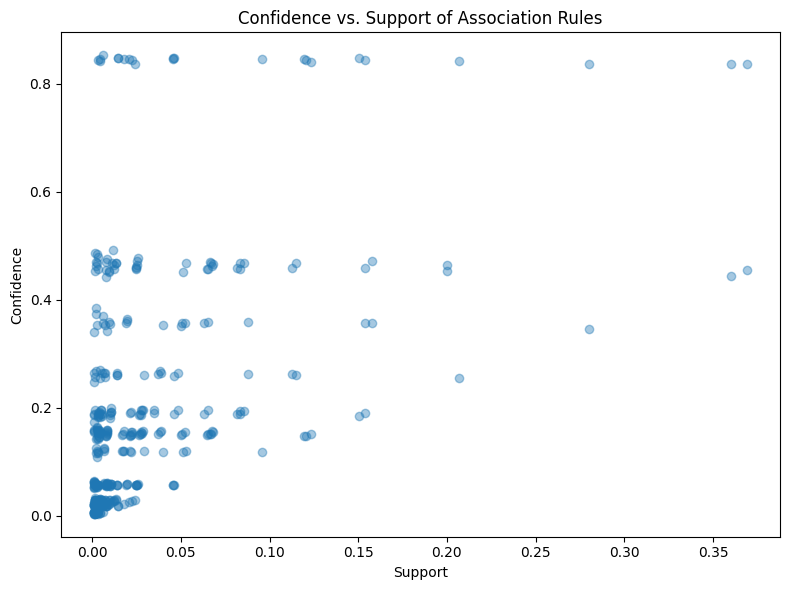

In [232]:
# Import the numpy module
import numpy as np

# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [233]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(50)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")



Cross-Selling Recommendations:
Customers who bought 'KARO' also bought 'EV'.
Customers who bought 'CAY-KAHVE-SEKER' also bought 'EV'.
Customers who bought 'KUMES' also bought 'EV'.
Customers who bought 'SIGARALAR' also bought 'EV'.
Customers who bought 'DETERJAN' also bought 'EV'.
Customers who bought 'KAGIT' also bought 'EV'.
Customers who bought 'SOGUK ICECEKLER' also bought 'EV'.
Customers who bought 'SEBZE' also bought 'EV'.
Customers who bought 'YESILLIK' also bought 'EV'.
Customers who bought 'ET' also bought 'EV'.
Customers who bought 'TEMIZLIK' also bought 'EV'.
Customers who bought 'MEYVE' also bought 'EV'.
Customers who bought 'SARF' also bought 'EV'.
Customers who bought 'MUHTELIF' also bought 'EV'.
Customers who bought 'SUT' also bought 'EV'.
Customers who bought 'KAHVALTILIK' also bought 'EV'.
Customers who bought 'BALIK' also bought 'EV'.
Customers who bought 'SEKERLEME' also bought 'EV'.
Customers who bought 'BEBEK' also bought 'EV'.
Customers who bought 'GIDA' also boug

## Suggesting a Product to Users at the Basket Stage

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   orderid        1000000 non-null  int64         
 1   orderdetailid  1000000 non-null  int64         
 2   date_          1000000 non-null  datetime64[ns]
 3   userid         1000000 non-null  int64         
 4   itemid         1000000 non-null  int64         
 5   amount         1000000 non-null  int64         
 6   unitprice      1000000 non-null  float64       
 7   price          1000000 non-null  float64       
 8   totalprice     1000000 non-null  float64       
 9   category1      1000000 non-null  object        
 10  category2      1000000 non-null  object        
 11  category3      1000000 non-null  object        
 12  category4      1000000 non-null  object        
 13  brand          1000000 non-null  object        
 14  usergender     1000000 non-null  in

In [235]:
def check_product(item, df =df):
    product_name = df[df["category1"] == item]["category1"].unique()[0]
    return product_name

In [236]:
def recommend_product(item, df = df, qty = 5):
    products = item
    code_list = []
    name_list = []
    sorted_rules = rules.sort_values("lift", ascending=False)
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == products:
                code_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
                code_list = list(dict.fromkeys(code_list))
                
        # Print product name for the df 
    if len(code_list) <= 0:
        return "Invalid Product, try again!"
    else:
        for code in code_list:
            name_list.append(check_product(code))
    
    
    print(f"Recommended product(s) for {item} is/are:")
    for i, item in enumerate(name_list):
        print(i+1, item)

In [237]:
recommend_product("YESILLIK")

Recommended product(s) for YESILLIK is/are:
1 OYUNCAK
2 GIDA
3 KOZMETIK
4 EV
5 SEKERLEME


In [238]:
temp = df[['category1', 'price']].copy()
temp=temp[temp['category1']=='EV']
data=temp.copy()
x= data['price'].mean()

# temp = df[['category1', 'price']].copy()
# temp=temp[temp['category1']=='Ev-GIDA']
# data=temp.copy()
# y= data['price'].mean()

data['price']

0          20.42
5          36.32
9          70.66
11         89.22
13         49.71
           ...  
999986     40.59
999990     25.67
999993     76.29
999998    183.22
999999     35.93
Name: price, Length: 364415, dtype: float64

In [239]:
# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")


Upselling Recommendations:


In [240]:
x = df[['date_','amount','itemid','unitprice', 'price']].copy()
# x=x[x['itemid']==8392]
data=x.copy()
data=data.sort_values(by=['itemid','date_'])

data['diff']=data['date_'].diff()
# data.drop(columns=['itemid','date_'],axis=1, inplace=True)
data['diff'] = data['diff'].dt.days

data

,date_,amount,itemid,unitprice,price,diff
751167,2021-01-01,7,1,25.75,13.83,NaN
888912,2021-02-03,5,1,25.75,14.46,33.0
398726,2021-02-15,3,1,25.75,15.32,12.0
538608,2021-03-03,4,1,25.75,15.89,16.0
757932,2021-04-01,3,1,25.75,14.71,29.0
...,...,...,...,...,...,...
117554,2023-05-21,4,27000,118.98,127.42,31.0
159142,2023-05-31,2,27000,118.98,135.40,10.0
354753,2023-07-10,8,27000,118.98,129.13,40.0
985572,2023-07-31,3,27000,118.98,43.01,21.0


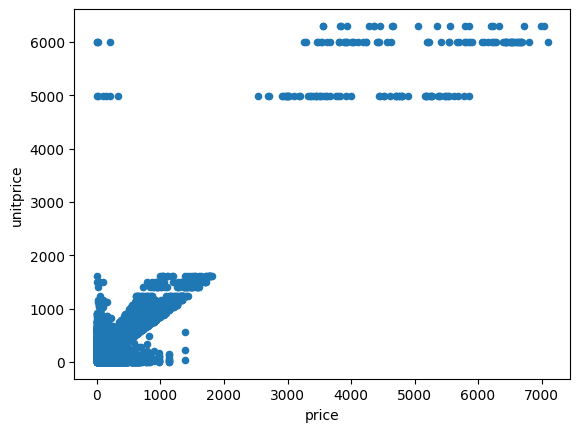

In [241]:
data.plot(x='price', y='unitprice', kind='scatter')

# Show the plot
plt.show()

In [242]:
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# #plotting a scatter plot graph for ride duration against cost of ride
# fig = px.scatter(data, x='price', 
#                  y='unitprice',
#                  title='Expected Ride Duration vs Historical Cost of Ride',
#                  trendline='ols')
# fig.show()

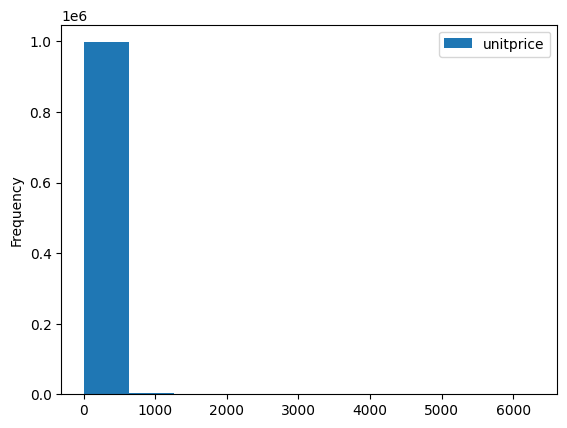

In [243]:
data.plot(x='price', y='unitprice', kind='hist')

# Show the plot
plt.show()

## Dynamic Pricing and Price Oredection using ML Models

### Prepare and spliting the data for training and testing 

In [244]:
data=data.dropna();
X = data[['unitprice','diff','amount']]
y = data['price']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision tree

In [245]:
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(X_train,y_train)

[Text(0.5, 0.875, 'x[0] <= 189.025\nsquared_error = 9908.196\nsamples = 699999\nvalue = 56.548'),
 Text(0.25, 0.625, 'x[0] <= 67.375\nsquared_error = 1768.139\nsamples = 656559\nvalue = 41.668'),
 Text(0.125, 0.375, 'x[0] <= 29.775\nsquared_error = 625.765\nsamples = 492598\nvalue = 24.508'),
 Text(0.0625, 0.125, 'squared_error = 443.668\nsamples = 311380\nvalue = 14.699'),
 Text(0.1875, 0.125, 'squared_error = 489.241\nsamples = 181218\nvalue = 41.362'),
 Text(0.375, 0.375, 'x[0] <= 119.21\nsquared_error = 1657.338\nsamples = 163961\nvalue = 93.226'),
 Text(0.3125, 0.125, 'squared_error = 795.044\nsamples = 110249\nvalue = 77.007'),
 Text(0.4375, 0.125, 'squared_error = 1779.205\nsamples = 53712\nvalue = 126.515'),
 Text(0.75, 0.625, 'x[0] <= 3302.25\nsquared_error = 79017.285\nsamples = 43440\nvalue = 281.436'),
 Text(0.625, 0.375, 'x[0] <= 459.1\nsquared_error = 24861.115\nsamples = 43321\nvalue = 270.139'),
 Text(0.5625, 0.125, 'squared_error = 8579.584\nsamples = 37653\nvalue = 23

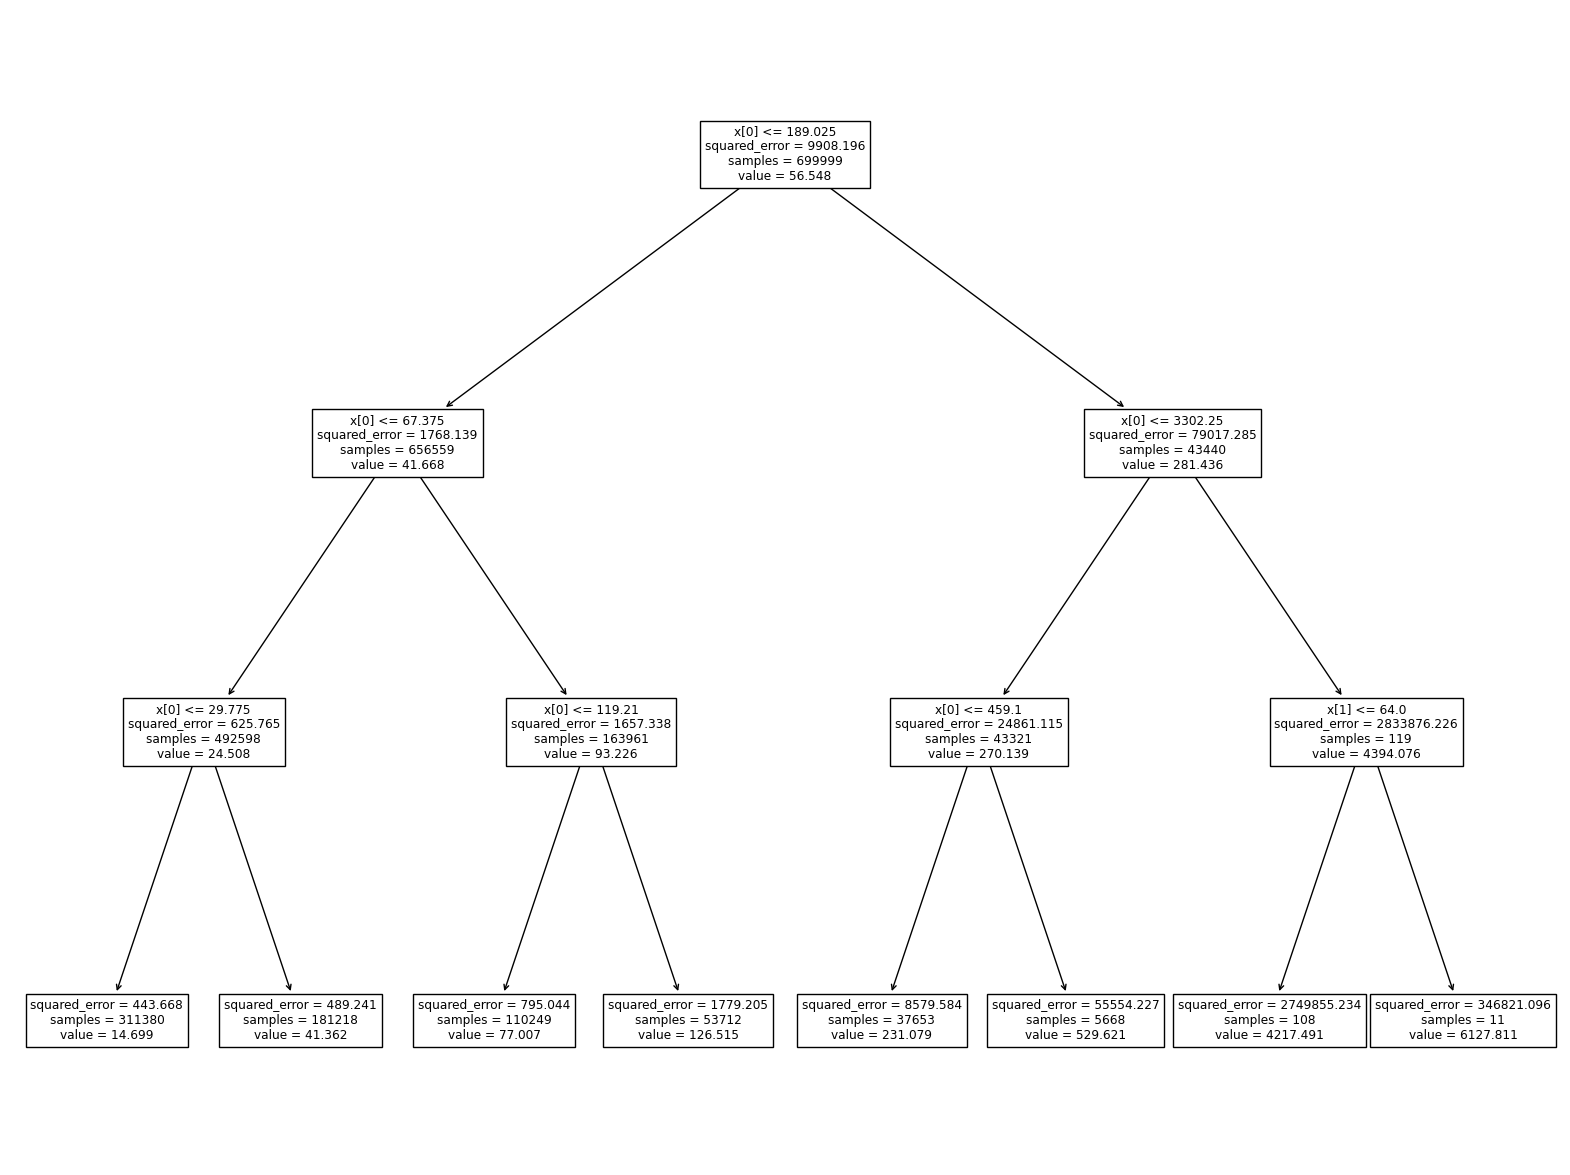

In [246]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=[20,15])
plot_tree(clf)

In [247]:

y_pred=clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986
results = {'Decision tree': [mean_squared_error(y_test, y_pred), math.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred)]}



1906.597145772061
43.664598312271934
18.369287179422432


In [248]:
DecisionTreeRegressor_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {DecisionTreeRegressor_r2}")

R-squared: 0.8188488944499324


### Bayesian Ridge Regression model

In [249]:
regr = linear_model.BayesianRidge()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
results['Bayesian Ridge']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]
results

1311.9303066664008
36.220578497125096
14.890917451038506


{'Decision tree': [1906.597145772061, 43.664598312271934, 18.369287179422432],
 'Bayesian Ridge': [1311.9303066664008,
  36.220578497125096,
  14.890917451038506]}

In [250]:
BayesianRidge_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {BayesianRidge_r2}")

R-squared: 0.8753498472478725


### Linear Regression

In [251]:

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the prices on the testing set
y_pred = model.predict(X_test)


In [252]:


print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))


results['Linear regression']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]
results

1311.9297545755444
36.22057087589239
14.890906976787358


{'Decision tree': [1906.597145772061, 43.664598312271934, 18.369287179422432],
 'Bayesian Ridge': [1311.9303066664008,
  36.220578497125096,
  14.890917451038506],
 'Linear regression': [1311.9297545755444,
  36.22057087589239,
  14.890906976787358]}

In [253]:
LinearRegression_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {LinearRegression_r2}")


R-squared: 0.8753498997035625


### Randamforest

In [254]:
from sklearn.ensemble import RandomForestRegressor

random_regr = RandomForestRegressor(max_depth=3, random_state=0)
random_regr.fit(X_train,y_train)
y_pred=random_regr.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

print(mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986
results['randam forest']=[mean_squared_error(y_test, y_pred),math.sqrt(mean_squared_error(y_test, y_pred)),mean_absolute_error(y_test, y_pred)]
results

[ 61.74033529  33.77887969  33.77887969 ...  35.54256547  18.06946988
 109.21082547]
1727.253442572095
41.56023872130783
17.998204456306453


{'Decision tree': [1906.597145772061, 43.664598312271934, 18.369287179422432],
 'Bayesian Ridge': [1311.9303066664008,
  36.220578497125096,
  14.890917451038506],
 'Linear regression': [1311.9297545755444,
  36.22057087589239,
  14.890906976787358],
 'randam forest': [1727.253442572095, 41.56023872130783, 17.998204456306453]}

In [255]:
RandomForestRegressor_r2 = r2_score(y_test, y_pred)
print(f"R-squared: {RandomForestRegressor_r2}")

R-squared: 0.8358888392438081


### compare models 

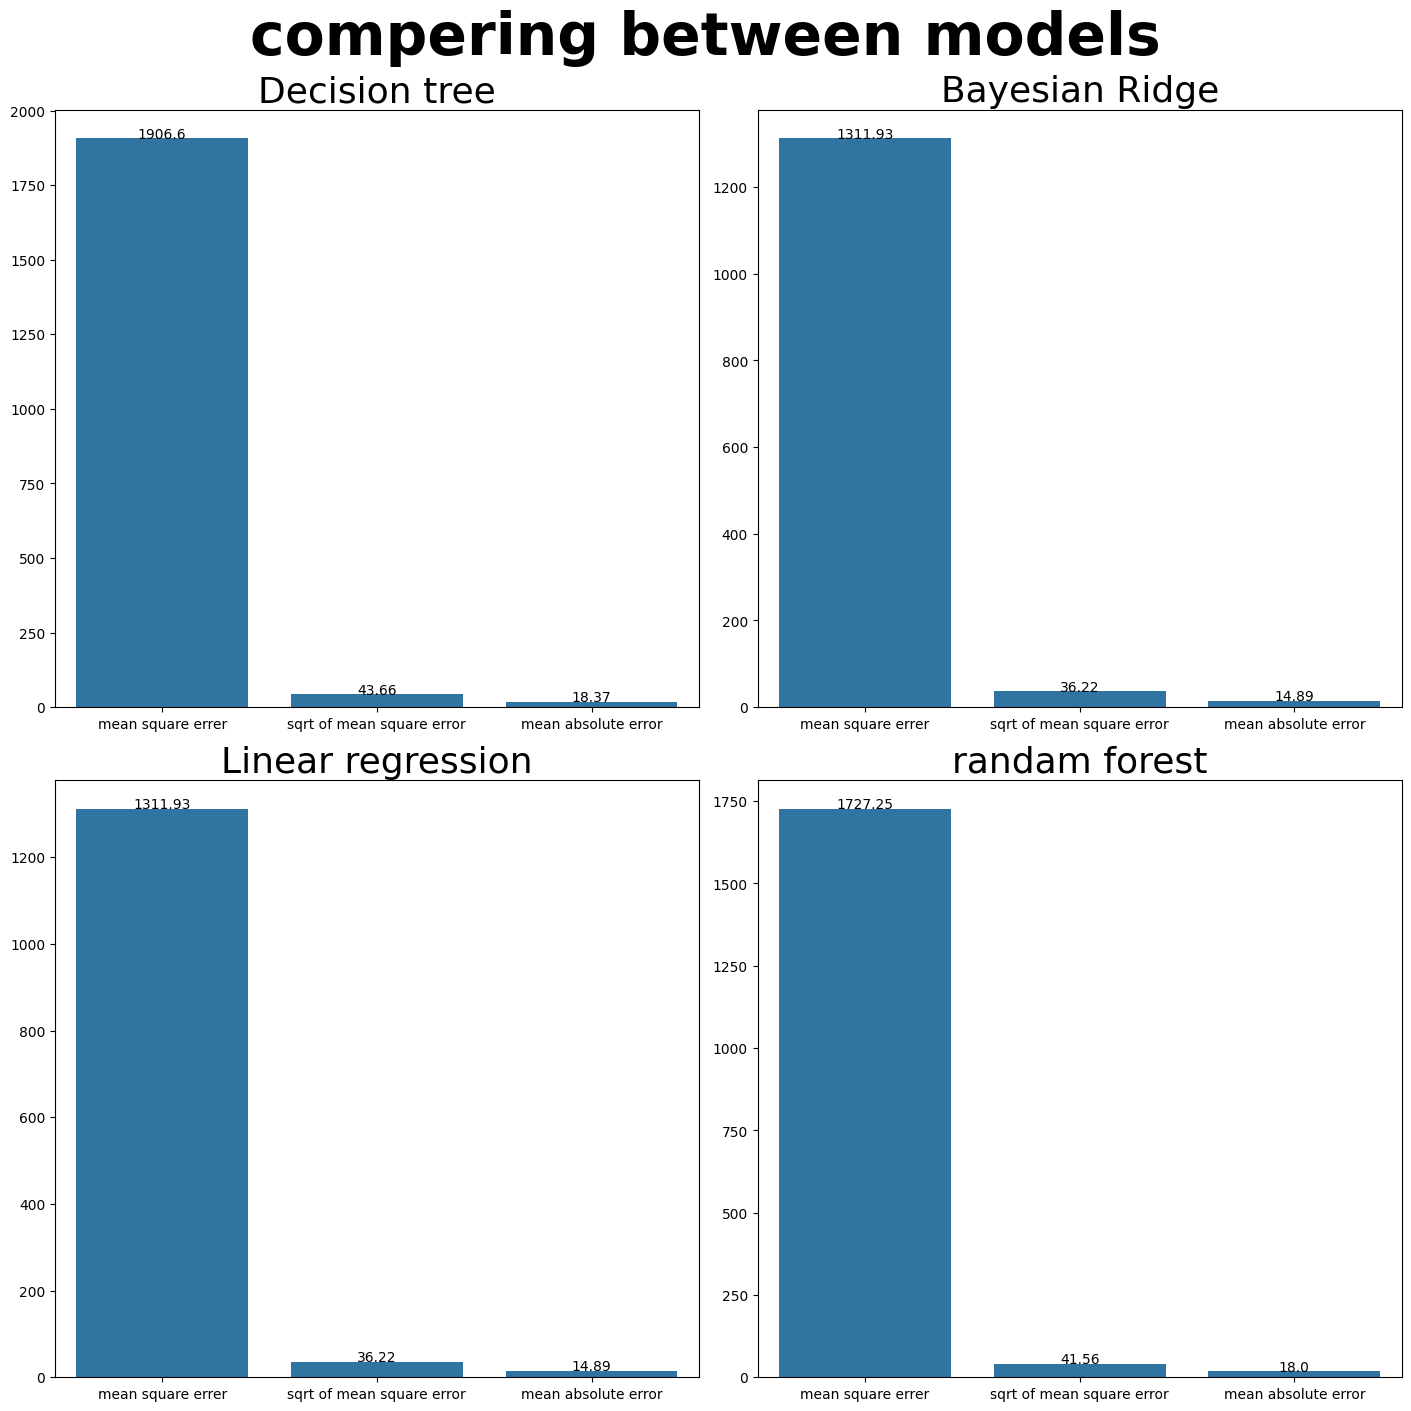

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [256]:
def plotCompare(results,x_ax):
    
  fig, axs = plt.subplots(nrows=2, ncols=2,
                          figsize=(14,14), constrained_layout=True)
  fig.suptitle('compering between models',fontweight="bold",size=42)

  for i, var in enumerate(results.keys()):
      row = i//2
      pos = i % 2
      plt.figure(figsize=(12,5))
      d=[]
      value=results[var]
      for v in value:
        d.append(v)
      
      
      axs[row, pos].set_title(var, size=26)
      g = sns.barplot(x=x_ax, y=d,ax=axs[row][pos])
      counter=0
      for va in value:
        v=round(va,2)
        g.text(counter,va,v, color='black', ha="center")
        counter+=1

plotCompare(results,['mean square errer','sqrt of mean square error','mean absolute error'])


### R square test
- 0.00 - 0.20: Weak or no relationship
- 0.20 - 0.40: Fair relationship
- 0.40 - 0.60: Moderate relationship
- 0.60 - 0.80: Strong relationship
- 0.80 - 1.00: Very strong relationship

In [257]:
print("R^2 for Linear Regression Model is",LinearRegression_r2)
print("R^2 for Bayesian Ridge Model is",BayesianRidge_r2)
print("R^2 for Random Forest Model is",RandomForestRegressor_r2)
print("R^2 for Decision Tree Model is",DecisionTreeRegressor_r2)


R^2 for Linear Regression Model is 0.8753498997035625
R^2 for Bayesian Ridge Model is 0.8753498472478725
R^2 for Random Forest Model is 0.8358888392438081
R^2 for Decision Tree Model is 0.8188488944499324
